In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv("dataset.csv",sep=";")

In [3]:
df['date'] = pd.to_datetime(df['date'])
df

,date,ResetSearch_branding_spend,ResetAfterDrinkSearch_branding_spend,ShoppingReset_spend,quarter_1,quarter_2,quarter_3,quarter_4,dutch_sports_event,dutch_hol_fest,weekend_clicks,week_purchases,sessions_reset,engagedSessions_reset,conversions_reset,totalRevenue_reset,sessions_no_reset,engagedSessions_no_reset,conversions_no_reset,totalRevenue_no_reset
0,2023-06-19,1.9500,0.0000,0.0,0,1,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0.0
1,2023-06-20,1.0200,0.0000,0.0,0,1,0,0,0,0,0,0,0,0,0,0.0,1,1,0,0.0
2,2023-06-21,1.7400,0.0000,0.0,0,1,0,0,0,0,0,1,0,0,0,0.0,0,0,0,0.0
3,2023-06-22,10.7600,0.0000,0.0,0,1,0,0,0,1,0,1,0,0,0,0.0,4,2,0,0.0
4,2023-06-23,6.7700,0.0000,0.0,0,1,0,0,0,1,0,0,0,0,0,0.0,1,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,2024-04-15,2.8554,6.4407,0.0,0,1,0,0,0,0,0,0,8,6,0,0.0,173,66,0,0.0
302,2024-04-16,4.1757,3.4028,0.0,0,1,0,0,0,0,0,0,14,9,0,0.0,158,67,0,0.0
303,2024-04-17,17.2074,4.2509,0.0,0,1,0,0,0,0,0,1,9,6,0,0.0,131,49,0,0.0
304,2024-04-18,8.4695,0.9339,0.0,0,1,0,0,0,0,0,1,12,7,0,0.0,131,47,0,0.0


In [4]:
first_date_sessions_not_zero = df[df['engagedSessions_reset'] != 0].iloc[0]['date'] #find the date before the first session generated
first_date_sessions_not_zero

Timestamp('2023-08-07 00:00:00')

In [5]:
df = df[df['date'] >= first_date_sessions_not_zero] #remove the rows before this date
df

,date,ResetSearch_branding_spend,ResetAfterDrinkSearch_branding_spend,ShoppingReset_spend,quarter_1,quarter_2,quarter_3,quarter_4,dutch_sports_event,dutch_hol_fest,weekend_clicks,week_purchases,sessions_reset,engagedSessions_reset,conversions_reset,totalRevenue_reset,sessions_no_reset,engagedSessions_no_reset,conversions_no_reset,totalRevenue_no_reset
49,2023-08-07,0.0000,0.0200,0.00,0,0,1,0,0,0,0,0,2,1,0,0.0,55,27,0,0.0
50,2023-08-08,4.2300,0.1700,1.45,0,0,1,0,0,0,0,0,10,4,0,0.0,51,22,0,0.0
51,2023-08-09,5.4000,0.3500,3.97,0,0,1,0,0,0,0,1,19,10,0,0.0,88,38,0,0.0
52,2023-08-10,3.9833,0.8294,2.53,0,0,1,0,0,0,0,1,12,7,0,0.0,54,24,0,0.0
53,2023-08-11,5.1946,0.1310,3.33,0,0,1,0,0,0,0,0,16,11,0,0.0,90,24,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,2024-04-15,2.8554,6.4407,0.00,0,1,0,0,0,0,0,0,8,6,0,0.0,173,66,0,0.0
302,2024-04-16,4.1757,3.4028,0.00,0,1,0,0,0,0,0,0,14,9,0,0.0,158,67,0,0.0
303,2024-04-17,17.2074,4.2509,0.00,0,1,0,0,0,0,0,1,9,6,0,0.0,131,49,0,0.0
304,2024-04-18,8.4695,0.9339,0.00,0,1,0,0,0,0,0,1,12,7,0,0.0,131,47,0,0.0


In [6]:
print(df['ResetSearch_branding_spend'].skew()) #highly skewed data
print(df['ResetAfterDrinkSearch_branding_spend'].skew())
print(df['ShoppingReset_spend'].skew())

1.8764901969591934
0.906188673349572
0.7585164969824524


In [7]:
df['ResetSearch_branding_spend_log'] = np.log(df['ResetSearch_branding_spend'] + 1)

<ipython-input-7-f13138c991ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ResetSearch_branding_spend_log'] = np.log(df['ResetSearch_branding_spend'] + 1)


In [8]:
df = df.drop(['ResetSearch_branding_spend'], axis=1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257 entries, 49 to 305
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  257 non-null    datetime64[ns]
 1   ResetAfterDrinkSearch_branding_spend  257 non-null    float64       
 2   ShoppingReset_spend                   257 non-null    float64       
 3   quarter_1                             257 non-null    int64         
 4   quarter_2                             257 non-null    int64         
 5   quarter_3                             257 non-null    int64         
 6   quarter_4                             257 non-null    int64         
 7   dutch_sports_event                    257 non-null    int64         
 8   dutch_hol_fest                        257 non-null    int64         
 9   weekend_clicks                        257 non-null    int64         
 10  week_p

# **KPI 1: Engaged Sessions**

##**OLS**

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [11]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [12]:
X_ie = df.drop(['date','sessions_reset','engagedSessions_reset','conversions_reset',
             'totalRevenue_reset','sessions_no_reset','engagedSessions_no_reset',
             'conversions_no_reset','totalRevenue_no_reset','quarter_4'], axis=1)  #features
X_ie = sm.add_constant(X_ie)
y_ie = df['engagedSessions_reset']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X_ie, y_ie, test_size=0.2, random_state=42)

In [13]:
model = sm.OLS(y_train, X_train).fit()

y_pred_ols = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_ols)
r2 = r2_score(y_test, y_pred_ols)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

print(model.summary())

Mean Squared Error: 6.668600626877847
R-squared: 0.09532931491683205
                              OLS Regression Results                             
Dep. Variable:     engagedSessions_reset   R-squared:                       0.204
Model:                               OLS   Adj. R-squared:                  0.163
Method:                    Least Squares   F-statistic:                     4.980
Date:                   Wed, 05 Jun 2024   Prob (F-statistic):           1.99e-06
Time:                           15:27:39   Log-Likelihood:                -495.31
No. Observations:                    205   AIC:                             1013.
Df Residuals:                        194   BIC:                             1049.
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
------

In [14]:
coef_df = pd.DataFrame(model.summary().tables[1].data)
coef_df

,0,1,2,3,4,5,6
0,,coef,std err,t,P>|t|,[0.025,0.975]
1,const,4.8928,0.705,6.939,0.000,3.502,6.283
2,ResetAfterDrinkSearch_branding_spend,0.1708,0.113,1.519,0.131,-0.051,0.393
3,ShoppingReset_spend,0.7630,0.157,4.860,0.000,0.453,1.073
4,quarter_1,0.7411,0.475,1.561,0.120,-0.195,1.677
5,quarter_2,0.7858,0.984,0.799,0.425,-1.154,2.726
6,quarter_3,-0.3441,0.538,-0.640,0.523,-1.404,0.716
7,dutch_sports_event,-0.6902,0.642,-1.075,0.284,-1.956,0.576
8,dutch_hol_fest,0.2486,0.790,0.315,0.753,-1.310,1.807
9,weekend_clicks,-0.5958,0.483,-1.234,0.219,-1.548,0.356


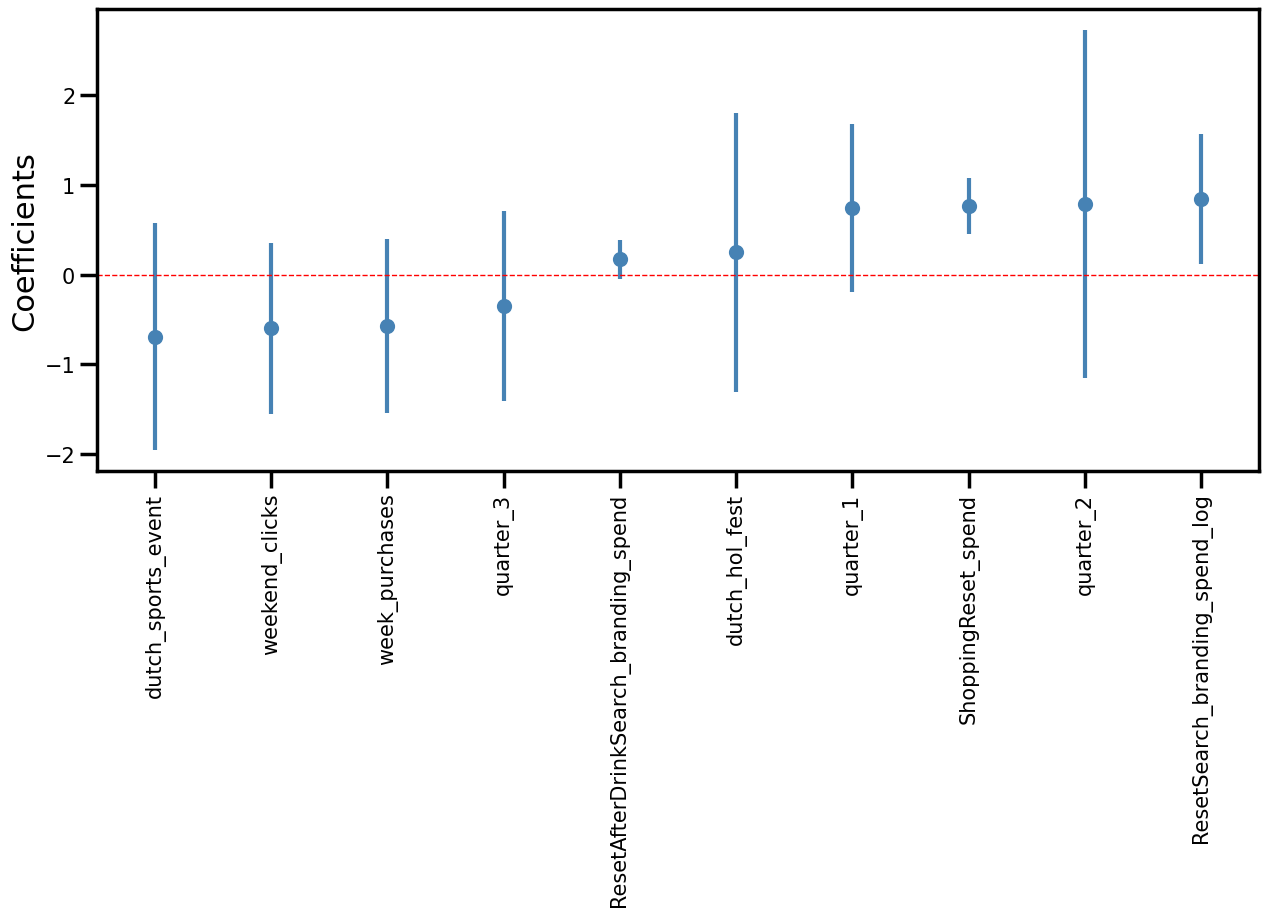

In [15]:
# Define function to output plot of the model coefficients

def coefplot(results):
    '''
    Takes in results of OLS model and returns a plot of
    the coefficients with 95% confidence intervals.

    Removes intercept, so if uncentered will return error.
    '''
    # Create dataframe of results summary
    coef_df = pd.DataFrame(results.summary().tables[1].data)

    # Add column names
    coef_df.columns = coef_df.iloc[0]

    # Drop the extra row with column labels
    coef_df=coef_df.drop(0)

    # Set index to variable names
    coef_df = coef_df.set_index(coef_df.columns[0])

    # Change datatype from object to float
    coef_df = coef_df.astype(float)

    # Get errors; (coef - lower bound of conf interval)
    errors = coef_df['coef'] - coef_df['[0.025']

    # Append errors column to dataframe
    coef_df['errors'] = errors

    # Drop the constant for plotting
    coef_df = coef_df.drop(['const'])

    # Sort values by coef ascending
    coef_df = coef_df.sort_values(by=['coef'])

    ### Plot Coefficients ###

    # x-labels
    variables = list(coef_df.index.values)

    # Add variables column to dataframe
    coef_df['variables'] = variables

    # Set sns plot style back to 'poster'
    # This will make bars wide on plot
    sns.set_context("poster")

    # Define figure, axes, and plot
    fig, ax = plt.subplots(figsize=(15, 6))

    # Error bars for 95% confidence interval
    # Can increase capsize to add whiskers
    coef_df.plot(x='variables', y='coef', kind='bar',
                 ax=ax, color='none', fontsize=15,
                 ecolor='steelblue',capsize=0,
                 yerr='errors', legend=False)

    # Set title & labels
    ax.set_ylabel('Coefficients',fontsize=22)
    ax.set_xlabel('',fontsize=22)

    # Coefficients
    ax.scatter(x=np.arange(coef_df.shape[0]),
               marker='o', s=80,
               y=coef_df['coef'], color='steelblue')

    # Line to define zero on the y-axis
    ax.axhline(y=0, linestyle='--', color='red', linewidth=1)

    return plt.show()
  # Plot coefficients w/95% confidence intervals for Model

coefplot(model)

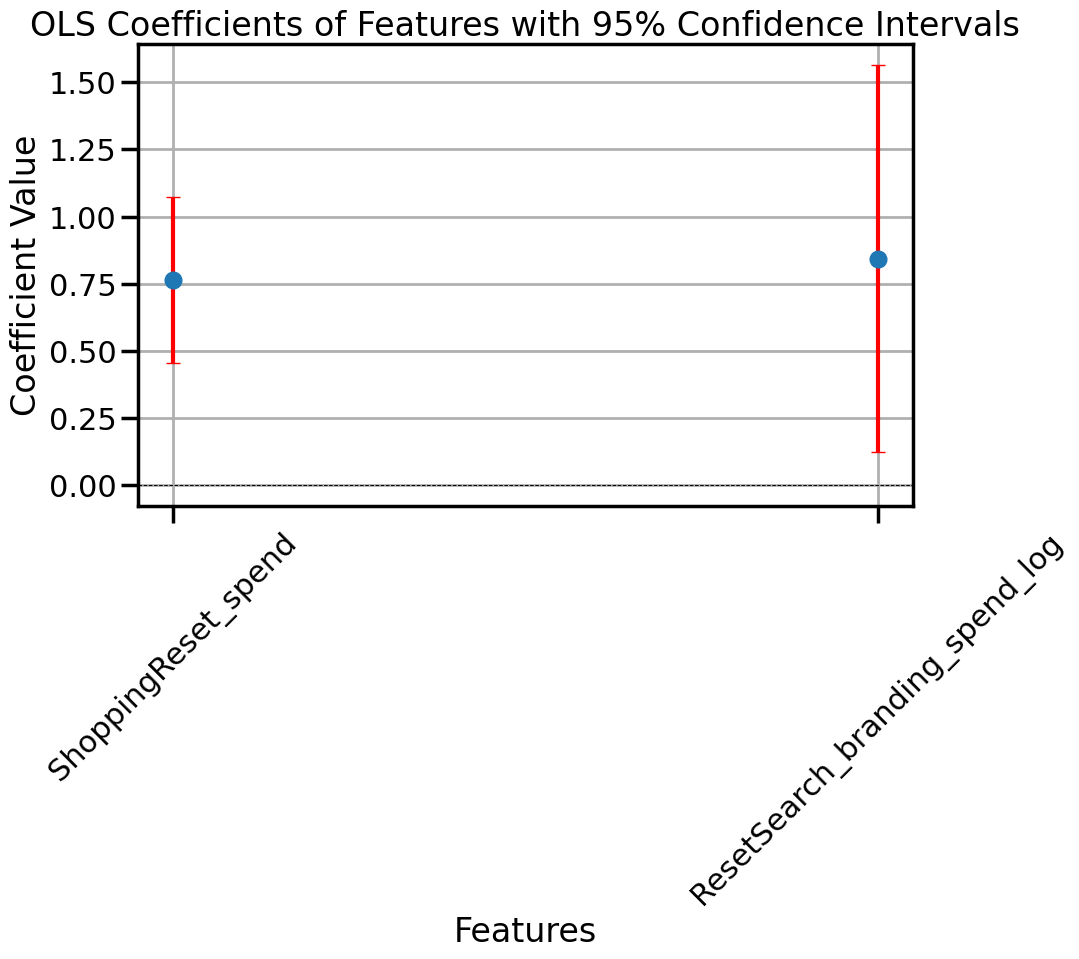

In [16]:
coefficients = model.params
p_values = model.pvalues
conf_intervals = model.conf_int(alpha=0.05)
# Filter coefficients with p-values < 0.05
significant_mask = (p_values < 0.05) & (p_values.index != 'const')

# Filter coefficients and confidence intervals based on significant p-values
significant_coefficients = coefficients[significant_mask]
significant_conf_intervals = conf_intervals[significant_mask]

# Create the plot
plt.figure(figsize=(10, 6))
plt.errorbar(significant_coefficients.index, significant_coefficients,
             yerr=[significant_coefficients - significant_conf_intervals[0],
                   significant_conf_intervals[1] - significant_coefficients],
             fmt='o', ecolor='r', capsize=5, label='Coefficients with 95% CI')
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('OLS Coefficients of Features with 95% Confidence Intervals')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Among 10 features, 3 features show significant effect on engaged sessions.


*   ResetAfterDrinkSearch_branding_spend is not statistically significant (p > 0.05). Its coefficient suggests a very small positive effect on the dependent variable, but since the confidence interval includes zero, this effect is not reliable.
*   Both ResetSearch_branding_spend_log and ShoppingReset_spend is statistically significant (p < 0.05) and have positive effect on the dependent variable.
*   Seasonality: The constant (4.89) represents the expected value of the dependent variable during quarter 4. Based on the regression results, we do not observe significant seasonality effects (all p-value are > 0.05).
*   dutch_sports_event, dutch_hol_fest, weekend_clicks, and week_purchases, do not show a significant effect in this model.

##**Lasso Regression**

In [17]:
from sklearn.linear_model import Lasso
lasso = Lasso()

# Fit the model to the training data
lasso.fit(X_train, y_train)

Lasso()

In [18]:
y_pred = lasso.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 7.585948844611148


In [19]:
r2_score(y_test, y_pred)

-0.029119289375303614

**Model Tuning**

In [20]:
from sklearn.linear_model import LassoCV
lasso_cv_model = LassoCV(alphas = np.random.randint(0,10,100), cv = 10, max_iter = 100000).fit(X_train,y_train)
lasso_cv_model.alpha_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 640.9888712945817, tolerance: 0.16436032608695653
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective di

0

In [21]:
lasso_tuned = Lasso().set_params(alpha = lasso_cv_model.alpha_).fit(X_train,y_train)

y_pred_tuned = lasso_tuned.predict(X_test)

mean_squared_error(y_test,y_pred_tuned)

<ipython-input-21-372ac8d0fdf9>:1: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_tuned = Lasso().set_params(alpha = lasso_cv_model.alpha_).fit(X_train,y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.532e+02, tolerance: 1.893e-01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordi

6.668600626877875

In [22]:
r2_score(y_test, y_pred_tuned)

0.09532931491682839

OLS model is the optimal solution

##**Random forest Regressor**

In [23]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

X = df.drop(['date','sessions_reset','engagedSessions_reset','conversions_reset',
             'totalRevenue_reset','sessions_no_reset','engagedSessions_no_reset',
             'conversions_no_reset','totalRevenue_no_reset'], axis=1)  #features
y = df['engagedSessions_reset']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Using Random Forest Default Setting**

In [24]:
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

# Fit the regressor with x and y data
regressor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [25]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(regressor.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': True, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [26]:
# Evaluating the model
# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# error for validation set
print(sklearn.metrics.mean_absolute_error(regressor.predict(X_test), y_test))

# error for training set
print(sklearn.metrics.mean_absolute_error(regressor.predict(X_train), y_train))

# Making predictions on the same data or new data
y_pred = regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Out-of-Bag Score: -0.3210445892817584
2.4384615384615387
0.948780487804878
Mean Squared Error: 8.726538461538464
R-squared: -0.1838531005418429


Remove Noise

Text(0.5, 1.0, 'Feature Importance - Engaged Sessions')

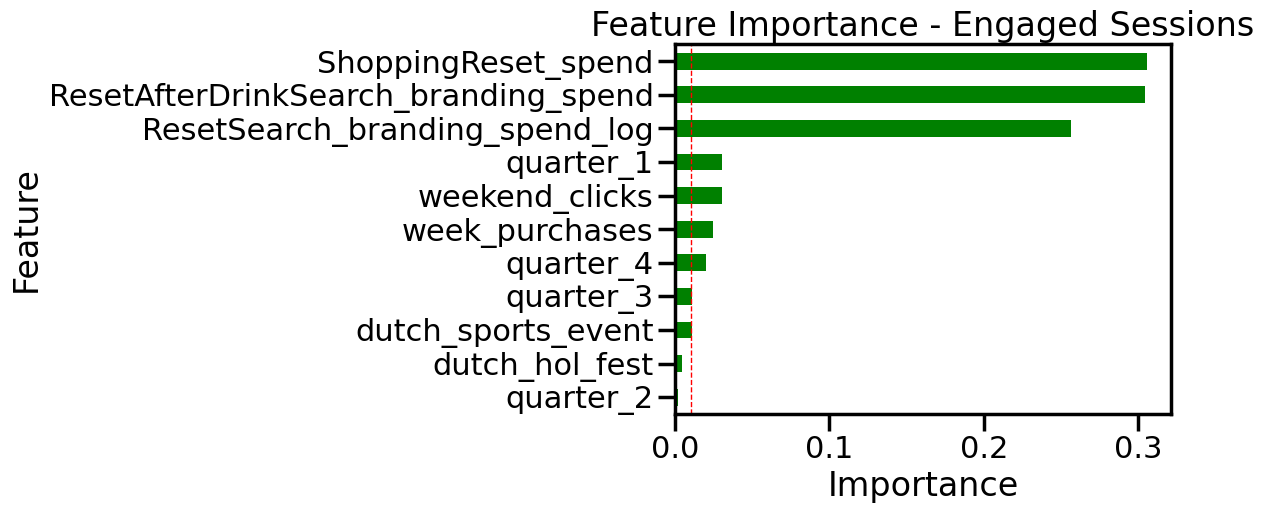

In [27]:
feature_importances = pd.Series (regressor.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=True, inplace=True)
feature_importances.plot.barh(color='green')
plt.axvline(x=0.01, linestyle='--', color='red', linewidth=1)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - Engaged Sessions")

In [28]:
importances = regressor.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Display feature importances
print("Feature importances:\n", feature_importance_df)

# Set importance threshold
threshold = 0.01

# Select features above the importance threshold
important_features = feature_importance_df[feature_importance_df['importance'] >= threshold]['feature']
X_reduced = X[important_features]

X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
# Train a new Random Forest model on the reduced dataset
rf_reduced = RandomForestRegressor(random_state=42)
rf_reduced.fit(X_train_reduced, y_train)

Feature importances:
                                  feature  importance
0   ResetAfterDrinkSearch_branding_spend    0.304142
1                    ShoppingReset_spend    0.305983
2                              quarter_1    0.030697
3                              quarter_2    0.001739
4                              quarter_3    0.010927
5                              quarter_4    0.020114
6                     dutch_sports_event    0.010815
7                         dutch_hol_fest    0.004284
8                         weekend_clicks    0.030078
9                         week_purchases    0.024612
10        ResetSearch_branding_spend_log    0.256608


RandomForestRegressor(random_state=42)

In [29]:
X_reduced

,ResetAfterDrinkSearch_branding_spend,ShoppingReset_spend,quarter_1,quarter_3,quarter_4,dutch_sports_event,weekend_clicks,week_purchases,ResetSearch_branding_spend_log
49,0.0200,0.00,0,1,0,0,0,0,0.000000
50,0.1700,1.45,0,1,0,0,0,0,1.654411
51,0.3500,3.97,0,1,0,0,0,1,1.856298
52,0.8294,2.53,0,1,0,0,0,1,1.606092
53,0.1310,3.33,0,1,0,0,0,0,1.823678
...,...,...,...,...,...,...,...,...,...
301,6.4407,0.00,0,0,0,0,0,0,1.349475
302,3.4028,0.00,0,0,0,0,0,0,1.643975
303,4.2509,0.00,0,0,0,0,0,1,2.901828
304,0.9339,0.00,0,0,0,0,0,1,2.248076


In [30]:
# error for validation set
print(sklearn.metrics.mean_absolute_error(rf_reduced.predict(X_test_reduced), y_test))

# error for training set
print(sklearn.metrics.mean_absolute_error(rf_reduced.predict(X_train_reduced), y_train))

# Making predictions on the same data or new data
y_pred = rf_reduced.predict(X_test_reduced)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

2.3965384615384617
0.8601951219512194
Mean Squared Error: 7.765184615384614
R-squared: -0.05343463776841273


In [31]:
important_features

0     ResetAfterDrinkSearch_branding_spend
1                      ShoppingReset_spend
2                                quarter_1
4                                quarter_3
5                                quarter_4
6                       dutch_sports_event
8                           weekend_clicks
9                           week_purchases
10          ResetSearch_branding_spend_log
Name: feature, dtype: object

#####**Using Random Search Cross Validation for fine tuning**

In [32]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = [i for i in range(1, 11)]
max_features.append(None)
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 20, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20, 25,30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [5, 10, 20]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 6, 8, 9, 11, 12, 14, 15, 17, 18, 20, None],
 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
 'min_samples_leaf': [5, 10, 20],
 'min_samples_split': [2, 5, 10, 15, 20, 25, 30],
 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}


In [33]:
#Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor(oob_score = True, random_state=0)
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rscv = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rscv.fit(X_train_reduced, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
111 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
111 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 434, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/

RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(oob_score=True,
                                                   random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 6, 8, 9, 11, 12, 14,
                                                      15, 17, 18, 20, None],
                                        'max_features': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, None],
                                        'min_samples_leaf': [5, 10, 20],
                                        'min_samples_split': [2, 5, 10, 15, 20,
                                                              25, 30],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=42, verbose=2)

In [34]:
#The best parameters for the model
rscv.best_params_

{'n_estimators': 70,
 'min_samples_split': 15,
 'min_samples_leaf': 20,
 'max_features': 5,
 'max_depth': 5,
 'bootstrap': True}

In [35]:
rf_rscv = rscv.best_estimator_

In [36]:
rf_rscv.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 5,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 20,
 'min_samples_split': 15,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 70,
 'n_jobs': None,
 'oob_score': True,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

**Random search fine tuning**

In [37]:
# Access the OOB Score
oob_score_rscv = rf_rscv.oob_score_
print(f'Out-of-Bag Score: {oob_score_rscv}')
# error for validation set
print(sklearn.metrics.mean_absolute_error(rf_rscv.predict(X_test_reduced), y_test))

# error for training set
print(sklearn.metrics.mean_absolute_error(rf_rscv.predict(X_train_reduced), y_train))

# Making predictions on the same data or new data
y_pred_rscv = rf_rscv.predict(X_test_reduced)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred_rscv)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred_rscv)
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.14066632848405336
2.1818520118770093
2.0399510314850398
Mean Squared Error: 6.630233841090998
R-squared: 0.10053420096778731


###**Evaluation**

**Comparison of 3 models**

In [38]:
def modelresults(predictions, model_name):
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    results_dict = {
        'Model': model_name,
        'MSE': mse,
        'R2 Score': r2
    }

    print('Results for {}:'.format(model_name))
    print('Mean squared error on model is {:.4f}'.format(mse))
    print('The r2 score on model is {:.4f}'.format(r2))

    return results_dict

results_ols = modelresults(y_pred_ols, model)
results_fit = modelresults(y_pred, regressor)
results_rscv = modelresults(y_pred_rscv, rf_rscv)

results_df = pd.DataFrame([results_ols,results_fit, results_rscv])
oob = ['NA',oob_score,oob_score_rscv]

# Add the new column using loc
results_df.loc[:, "oob score"] = oob
print(results_df)

Results for <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7b57f8d57c10>:
Mean squared error on model is 6.6686
The r2 score on model is 0.0953
Results for RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0):
Mean squared error on model is 7.7652
The r2 score on model is -0.0534
Results for RandomForestRegressor(max_depth=5, max_features=5, min_samples_leaf=20,
                      min_samples_split=15, n_estimators=70, oob_score=True,
                      random_state=0):
Mean squared error on model is 6.6302
The r2 score on model is 0.1005
                                               Model       MSE  R2 Score  \
0  <statsmodels.regression.linear_model.Regressio...  6.668601  0.095329   
1  (DecisionTreeRegressor(max_features=1.0, rando...  7.765185 -0.053435   
2  (DecisionTreeRegressor(max_depth=5, max_featur...  6.630234  0.100534   

  oob score  
0        NA  
1 -0.321045  
2  0.140666  


In summary, on average, RSCV fine tuning model has lowest MSE and highest R-squared value. An OOB score of approximately 0.562 indicates that the model explains about 56.2% of the variance in the dependent variable when evaluated on the out-of-bag samples, suggesting a moderately good fit. Thus, this model has the optimal solution and is the best model due to our test.

**



###**Visualization**

In [39]:
important_features

0     ResetAfterDrinkSearch_branding_spend
1                      ShoppingReset_spend
2                                quarter_1
4                                quarter_3
5                                quarter_4
6                       dutch_sports_event
8                           weekend_clicks
9                           week_purchases
10          ResetSearch_branding_spend_log
Name: feature, dtype: object

**Campaign Spending Partial Dependence**

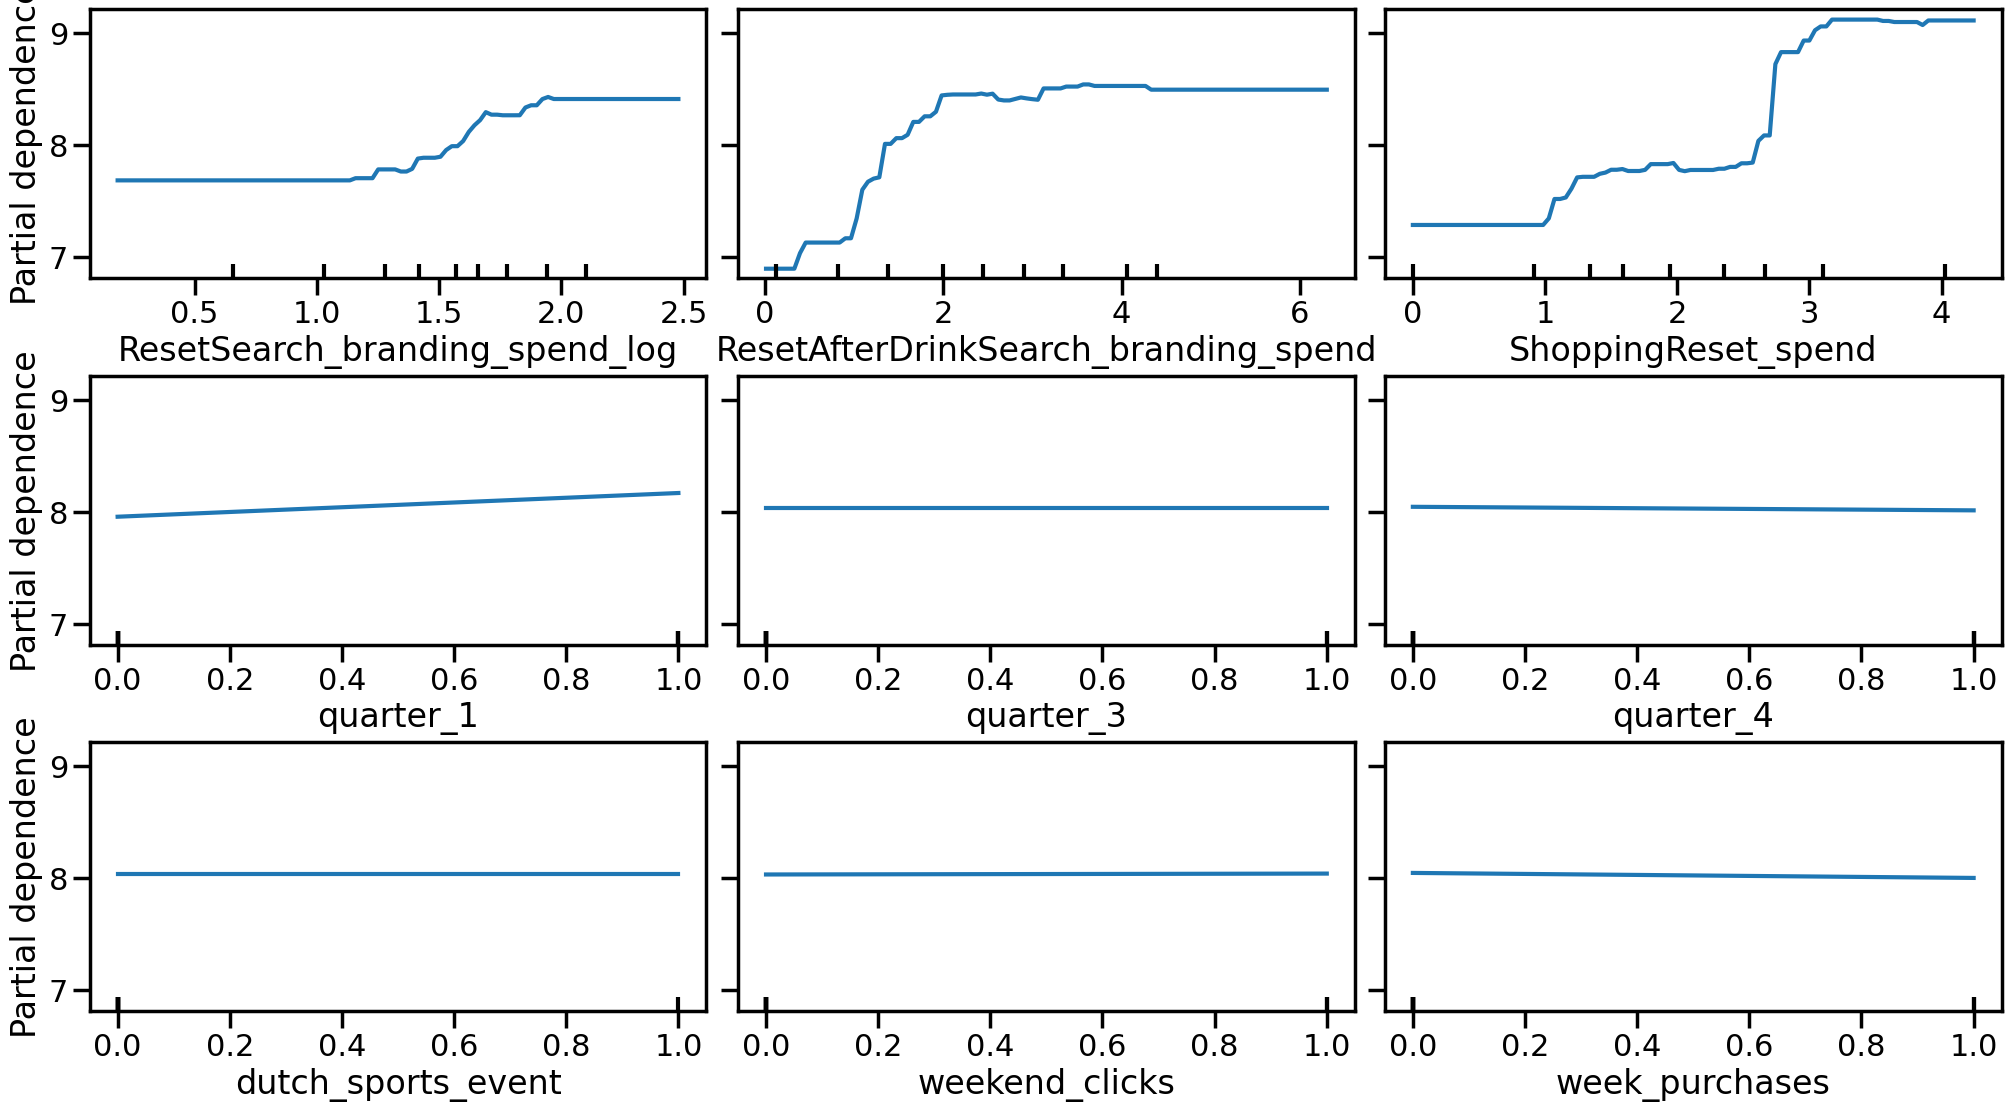

In [40]:
from sklearn.inspection import PartialDependenceDisplay
fig, ax = plt.subplots(figsize=(20, 11),layout="compressed")
ax.set_title("Decision Tree")
tree_disp = PartialDependenceDisplay.from_estimator(rf_rscv, X_train_reduced, ['ResetSearch_branding_spend_log', 'ResetAfterDrinkSearch_branding_spend',
                                                                         'ShoppingReset_spend', 'quarter_1',
                                                                         'quarter_3','quarter_4',
                                                                         'dutch_sports_event',
                                                                         'weekend_clicks', 'week_purchases'], ax=ax, )

The partial dependence plots below show the relationship (according the model that we trained) between different campaigns / seasons and number of Engagegd sessions.
1.   Engaged sessions increase as we increase ResetSearch_branding_spend up to 6. After that it does not significantly change the engaged sessions;
2.   Engaged sessions increase as we increase ResetAfterDrinkSearch_branding_spend up to 2. After that it does not significantly change the engaged sessions;
3.   ShoppingReset_spend also has significant effect on the target variable, however the number of engeged sessions stop increasing when we increase the campaign spending to 3.
4.   Regarding to seasonality, quarter 1 has slightly positive effect on the number of engaged sessions while the plot of the other 3 quaters are essentially flat  thus there is no significant effect spotted on them.
5.   There is no significant effect of holiday/festival and weekend purchasing.



**Feature Importance**

In [41]:
coefficients_df = pd.DataFrame({
    'Feature': X_train_reduced.columns,
    'Coefficient': rf_rscv.feature_importances_})

# Displaying coefficients nicely
print("Coefficients:")
print(coefficients_df)

Coefficients:
                                Feature  Coefficient
0  ResetAfterDrinkSearch_branding_spend     0.390755
1                   ShoppingReset_spend     0.396621
2                             quarter_1     0.039803
3                             quarter_3     0.000000
4                             quarter_4     0.005610
5                    dutch_sports_event     0.000000
6                        weekend_clicks     0.000697
7                        week_purchases     0.005725
8        ResetSearch_branding_spend_log     0.160789


Text(0.5, 1.0, 'Feature Importance - Engaged Sessions')

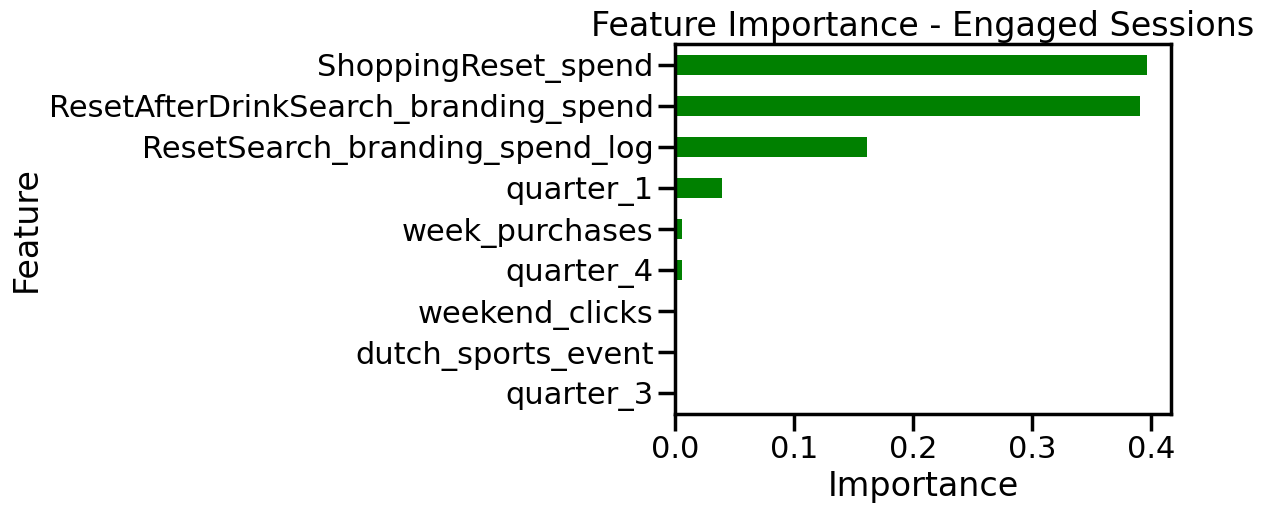

In [42]:
feature_importances = pd.Series (rf_rscv.feature_importances_, index=X_train_reduced.columns)
feature_importances.sort_values(ascending=True, inplace=True)
feature_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - Engaged Sessions")

* Among the total 11 features, there are 4 features importance above 0.01. ShoppingReset_spend has the most significant effect on the model with coefficient of 0.39, following by ResetAfterDrinkSearch_branding_spend with coefficient of 0.38.  ResetSearch_branding_spend has the least impact among the 3 campaign according the model, with only 0.17 feature importance.
* Regarding to seasonality, quarter 1 has the most significant effect on the model with coeffient of 0.05 followed by quarter 4. There is no significant effects on the other 2 seasons.
* According to the model, weekend clicks, week purchase, holidays and sports events do not significantly affect the model.

**Shap Value**

In [43]:
!pip install shap
import shap
explainer = shap.TreeExplainer(rf_rscv)
shap_values = explainer.shap_values(X_reduced)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 8.5 MB/s eta 0:00:00


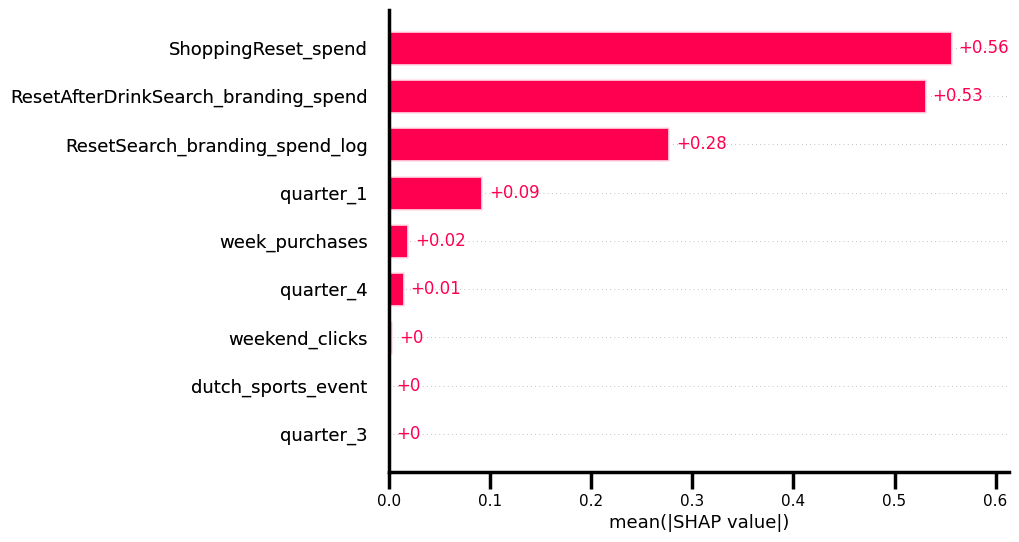

In [44]:
explainer = shap.Explainer(rf_rscv, X_reduced)
shap_values = explainer(X_reduced)
shap.plots.bar(shap_values)

SHAP value gives the same outcomes as feature importance thus the two plots comfirm each other.
* Regarding 3 campaigns, ShoppingReset_spend has the most significant effect on engaged sessions, following by ResetAfterDrinkSearch_branding_spend, ResetSearch_branding_spend has the least impact.
* Regarding seasonality, quarter 1 has the most effect on the number of engaged sessions with SHAP value of 0.12, followed by quarter 4, quarter 2 and quarter 3 has the least effect according to the model.
* weekend clicks, week purchases, holiday and sports have very insignificant impact on target value which is aligned with the outcome of feature importance.

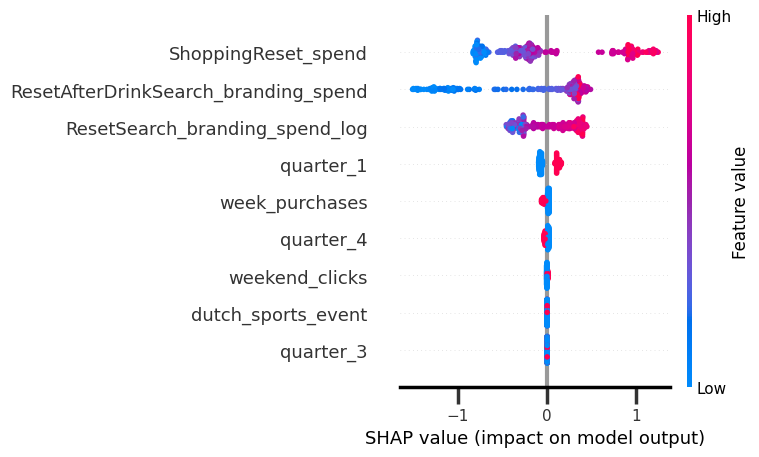

In [45]:
shap.summary_plot(shap_values, X_reduced)

#**KPI 2: Conversions**

In [46]:
# Model as a classification problem
df['conversions_reset'] = [1 if x >= 1 else x for x in df['conversions_reset']]

In [47]:
# Oversampling for unbalanced data
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

##**Logistic Regression**

#####**using Logistic Regression default setting**

In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sml

X_lr = df[['ResetSearch_branding_spend_log', 'ResetAfterDrinkSearch_branding_spend',
                                                                         'ShoppingReset_spend', 'quarter_1', 'quarter_2',
                                                                         'quarter_3',
                                                                         'dutch_sports_event','dutch_hol_fest',
                                                                         'weekend_clicks', 'week_purchases']]  #features
y_2_lr = df['conversions_reset']
# Resampling the minority class
sm = SMOTE(random_state=42, k_neighbors=5)
X_res, y_res = sm.fit_resample(X_lr, y_2_lr)

from sklearn.model_selection import train_test_split
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [49]:
logit_model=sml.Logit(y_train_lr,X_train_lr)
result=logit_model.fit()
print(result.summary())

         Current function value: 0.537150
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:      conversions_reset   No. Observations:                  304
Model:                          Logit   Df Residuals:                      294
Method:                           MLE   Df Model:                            9
Date:                Wed, 05 Jun 2024   Pseudo R-squ.:                  0.2250
Time:                        15:29:01   Log-Likelihood:                -163.29
converged:                      False   LL-Null:                       -210.69
Covariance Type:            nonrobust   LLR p-value:                 1.769e-16
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
ResetSearch_branding_spend_log           0.4226      0.218      1.937      0.053      -0.005

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


*   Overall, 5 over 10 variables has significant effect on the conversions (p-value < 0.05)
* Among the 6 variables, ResetAfterDrinkSearch_branding_spend and ShoppingReset_spend have a positive and statistically significant effect on the target variable
*   Seasonality: There is a significant negative effect on the target variable during the first and third quarter compared to the fourth quarter.
* dutch_sports_event, weekend_clicks and week_purchases have a significant negative effect on the target variable.



##**Random Forest Classifier**

#####**Default Model**

In [50]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

X_rf = df[['ResetSearch_branding_spend_log', 'ResetAfterDrinkSearch_branding_spend',
                                                                         'ShoppingReset_spend', 'quarter_1', 'quarter_2',
                                                                         'quarter_3','quarter_4',
                                                                         'dutch_sports_event','dutch_hol_fest',
                                                                         'weekend_clicks', 'week_purchases']] #features
y_rf = df['conversions_reset']  # Target variable

# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(random_state=42, k_neighbors=5)
X_rfc, y_rfc = sm.fit_resample(X_rf, y_rf)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_rfc, y_rfc, test_size=0.2, random_state=42)

In [51]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [52]:
# Evaluating the model
# Access the OOB Score
oob_score = classifier_rf.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# error for validation set
print(sklearn.metrics.mean_absolute_error(classifier_rf.predict(X_test), y_test))

# error for training set
print(sklearn.metrics.mean_absolute_error(classifier_rf.predict(X_train), y_train))


# Making predictions on the same data or new data
y_pred_rf = classifier_rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Out-of-Bag Score: 0.7993421052631579
0.2236842105263158
0.1118421052631579
Accuracy: 0.7763157894736842
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        40
           1       0.74      0.81      0.77        36

    accuracy                           0.78        76
   macro avg       0.78      0.78      0.78        76
weighted avg       0.78      0.78      0.78        76



Exclude noisy feature

Text(0.5, 1.0, 'Feature Importance - Conversion')

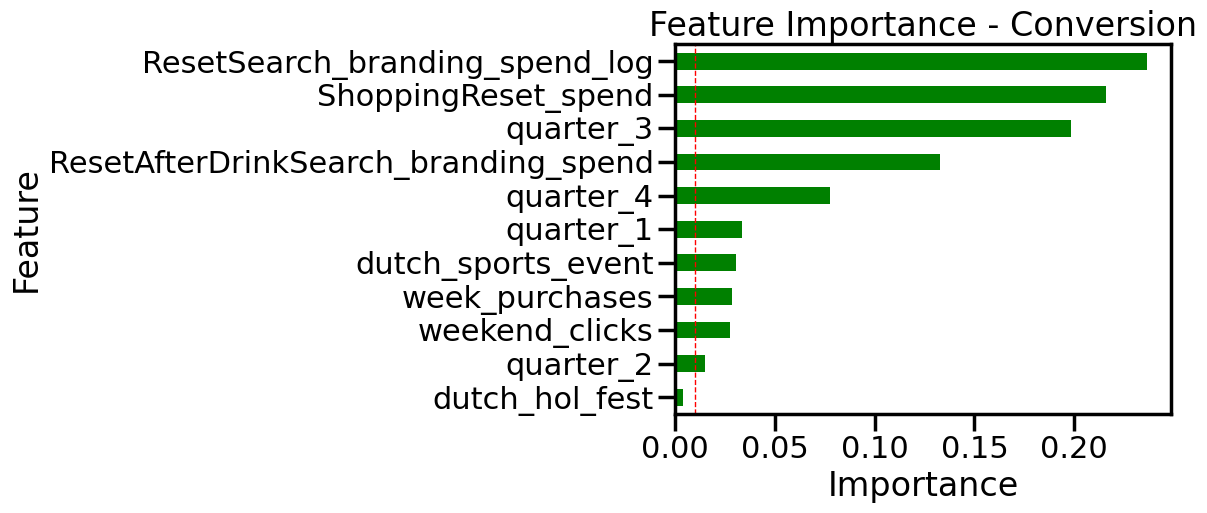

In [53]:
feature_importances = pd.Series (classifier_rf.feature_importances_, index=X_rfc.columns)
feature_importances.sort_values(ascending=True, inplace=True)
feature_importances.plot.barh(color='green')
plt.axvline(x=0.01, linestyle='--', color='red', linewidth=1)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - Conversion")

In [54]:
importances = classifier_rf.feature_importances_
feature_names = X_rfc.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Display feature importances
print("Feature importances:\n", feature_importance_df)

# Set importance threshold
threshold = 0.01

# Select features above the importance threshold
important_features = feature_importance_df[feature_importance_df['importance'] >= threshold]['feature']
X_reduced = X_rfc[important_features]

X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y_rfc, test_size=0.2, random_state=42)
# Train a new Random Forest model on the reduced dataset
rf_reduced = RandomForestClassifier(random_state=42)
rf_reduced.fit(X_train_reduced, y_train)

Feature importances:
                                  feature  importance
0         ResetSearch_branding_spend_log    0.236670
1   ResetAfterDrinkSearch_branding_spend    0.132510
2                    ShoppingReset_spend    0.215896
3                              quarter_1    0.033541
4                              quarter_2    0.015010
5                              quarter_3    0.198580
6                              quarter_4    0.077539
7                     dutch_sports_event    0.030771
8                         dutch_hol_fest    0.003811
9                         weekend_clicks    0.027311
10                        week_purchases    0.028362


RandomForestClassifier(random_state=42)

#####**Using Random Search Cross Validation for fine tuning**

In [55]:
from scipy.stats import randint
param_dist = {
    'n_estimators': np.arange(50, 200, 10),  # Number of trees in the forest
    'max_depth': [None, 5, 10, 20, 30],      # Maximum depth of the tree
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'min_samples_split': np.arange(2, 11),   # Minimum number of samples required to split an internal node
    'min_samples_leaf': np.arange(1, 11),    # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False],              # Whether bootstrap samples are used when building trees
}
rf = RandomForestClassifier(random_state=42, n_jobs=-1, oob_score= True)
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rscv = RandomizedSearchCV(estimator = rf, param_distributions = param_dist, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rscv.fit(X_train_reduced, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
129 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
129 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 434, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                                    random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190])},
                   random_state=42, verbose=2)

In [56]:
#The best parameters for the model
rscv.best_params_
rf_rscv = rscv.best_estimator_

In [57]:
rf_rscv.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 80,
 'n_jobs': -1,
 'oob_score': True,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [58]:
# Access the OOB Score
oob_score_rscv = rf_rscv.oob_score_
print(f'Out-of-Bag Score: {oob_score_rscv}')

# error for validation set
print(sklearn.metrics.mean_absolute_error(rf_rscv.predict(X_test_reduced), y_test))

# error for training set
print(sklearn.metrics.mean_absolute_error(rf_rscv.predict(X_train_reduced), y_train))


# Making predictions on the same data or new data
y_pred_rscv = rf_rscv.predict(X_test_reduced)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rscv)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rscv))

Out-of-Bag Score: 0.8223684210526315
0.21052631578947367
0.0
Accuracy: 0.7894736842105263
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        40
           1       0.78      0.78      0.78        36

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.79      0.79      0.79        76



##**Model Evaluation**

**Logistic Regression**

In [59]:
# Calculate accuracy
y_pred_lr = result.predict(X_test_lr)
prediction = list(map(round, y_pred_lr))
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test_lr, prediction))

Test accuracy =  0.7894736842105263


* The model performs reasonably well, with slightly better performance on class 1 in terms of recall and F1-score. The weighted averages suggest the model's performance is fairly balanced across both classes.

#####**RM default**

**RSCV fine tuning Model**

**Comparision of 3 Models**

In [60]:
results_lr = accuracy_score(y_test_lr, prediction)
results_rf = accuracy_score(y_test, y_pred_rf)
results_rscv = accuracy_score(y_test, y_pred_rscv)

results_df = {'accuracy':[results_lr,results_rf, results_rscv],
              'oob': ['NA',oob_score,oob_score_rscv]}

print(results_df)

{'accuracy': [0.7894736842105263, 0.7763157894736842, 0.7894736842105263], 'oob': ['NA', 0.7993421052631579, 0.8223684210526315]}


In summary, on average, rscv fine tuning model has the highest accuracy and f1 scores, at the same time, an OOB Score of approximately 0.83, indicating good generalization ability. Thus, this model has the optimal solution and is the best model due to our test.

##**Visualization**

**Partial Dependence**

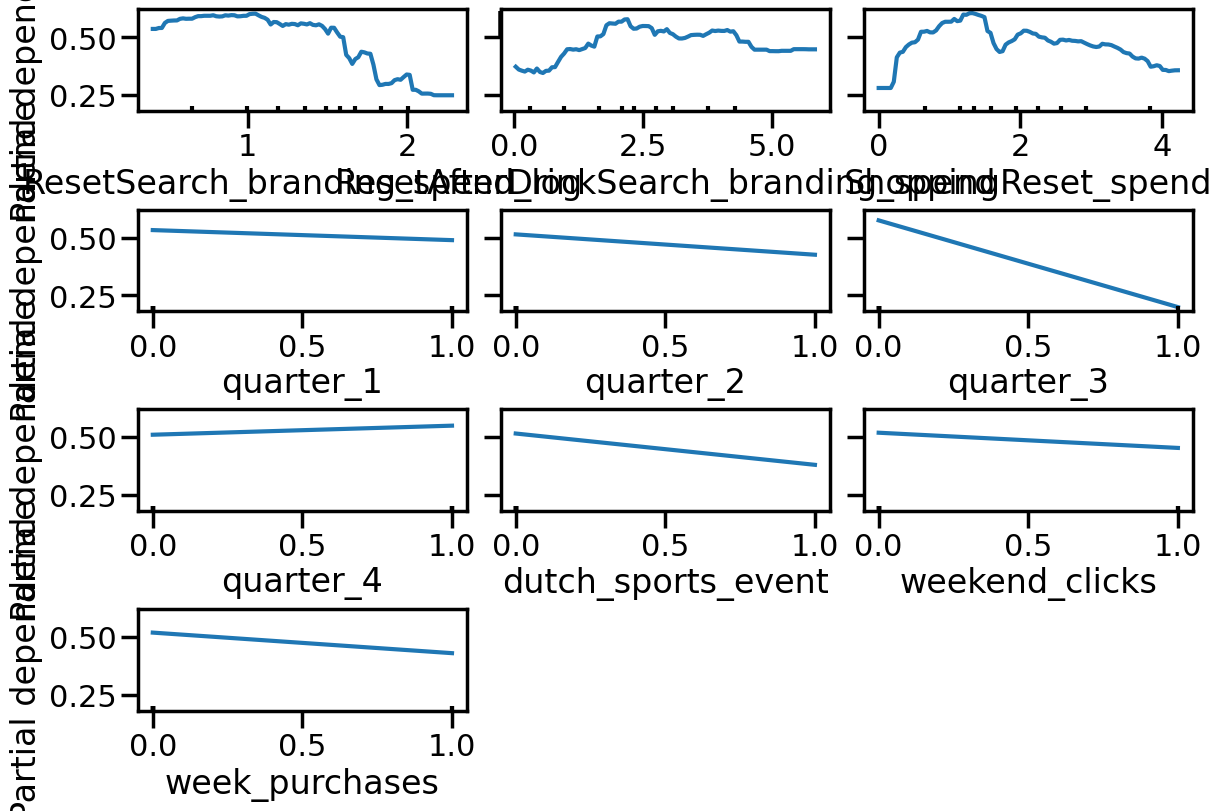

In [61]:
from sklearn.inspection import PartialDependenceDisplay
fig, ax = plt.subplots(figsize=(12, 8), layout="compressed")
ax.set_title("Decision Tree")
tree_disp = PartialDependenceDisplay.from_estimator(rf_rscv, X_train_reduced, ['ResetSearch_branding_spend_log', 'ResetAfterDrinkSearch_branding_spend',
                                                                         'ShoppingReset_spend', 'quarter_1', 'quarter_2',
                                                                         'quarter_3','quarter_4',
                                                                         'dutch_sports_event',
                                                                         'weekend_clicks', 'week_purchases'], ax=ax)
tree_disp

The partial dependence plots below show the relationship (according the model that we trained) between different campaigns / seasons and number of conversions.
1.   The figure of ResetSearch_branding_spend below shows there is a negative impact between the campaign spending and conversions.
2.   Chance of conversions increase as we increase ResetAfterDrinkSearch_branding_spend up to 2. After that it does not significantly change the amount of conversions;
3.   ShoppingReset_spend has significant positive effect on the target variable, however the number of conversions start decreasing when we increase the campaign spending to 1.
4.   Regarding to seasonality, quarter 4 has a slightly positive effect on conversions while quarter 1, 2 and 3 has negative impact on the number.
5.   There is no significant effect of holiday/festival and week/weekend purchasing.



**Feature Importances**

In [62]:
coefficients_df = pd.DataFrame({
    'Feature': X_reduced.columns,
    'Coefficient': rf_rscv.feature_importances_})

# Displaying coefficients nicely
print("Coefficients:")
print(coefficients_df)

Coefficients:
                                Feature  Coefficient
0        ResetSearch_branding_spend_log     0.260051
1  ResetAfterDrinkSearch_branding_spend     0.202349
2                   ShoppingReset_spend     0.250825
3                             quarter_1     0.031027
4                             quarter_2     0.009586
5                             quarter_3     0.117093
6                             quarter_4     0.043947
7                    dutch_sports_event     0.023967
8                        weekend_clicks     0.026659
9                        week_purchases     0.034496


Text(0.5, 1.0, 'Feature Importance - Conversios')

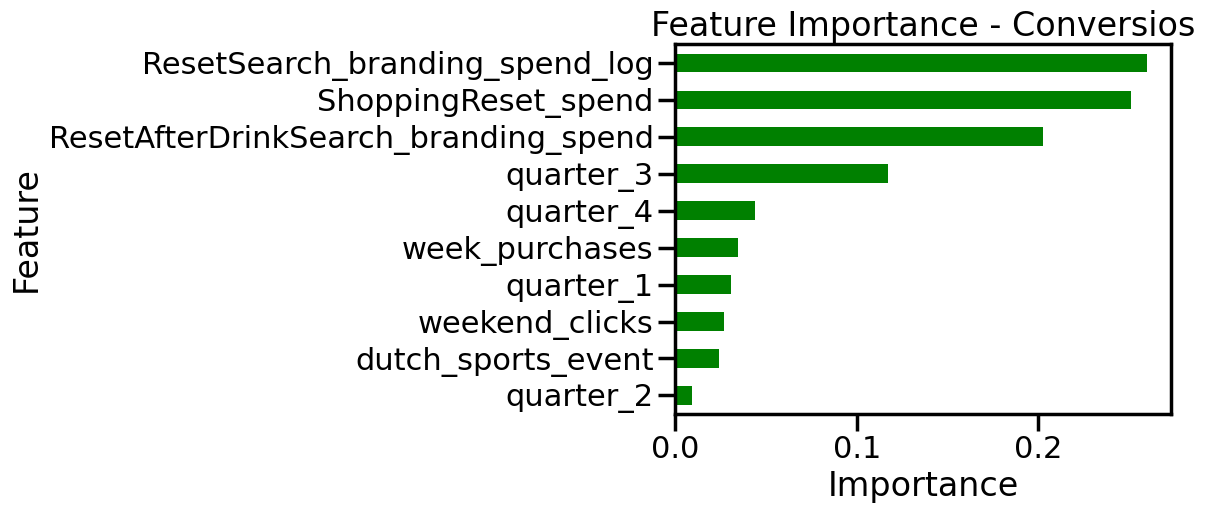

In [63]:
feature_importances = pd.Series (rf_rscv.feature_importances_, index=X_train_reduced.columns)
feature_importances.sort_values(ascending=True, inplace=True)
feature_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - Conversios")

* Among the total 11 features, there are 10 features importance above 0.01. ShoppingReset_spend has the most significant effect on model performance with coefficient of 0.26, following by ResetAfterDrinkSearch_branding_spend with coefficient of 0.185. ResetSearch_branding_spend has the least impact among the 3 campaign according the model, with 0.184 feature importance.
* Regarding to seasonality, quarter 3 has the most significant effect on model preformance with coeffient of 0.18 followed by quarter 4 with coefficient of 0.05 and quarter 1 with coefficient of 0.03. There is no significant effects on quarter 2.
* According to the model, weekend clicks has slightly more significant effect than week purchases, holidays and sports events do not affect the model performance.
